In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
data=pd.read_csv("/Users/anoop.sharma/Downloads/OPTIDX_NIFTY_CE_02-04-2020_TO_16-04-2020.csv")


data_pe=pd.read_csv("/Users/anoop.sharma/Downloads/OPTIDX_NIFTY_PE_02-04-2020_TO_16-04-2020.csv")
data_pe.head(1)

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,NIFTY,03-Apr-2020,23-Apr-2020,PE,12500,0.0,0.0,0.0,498.85,0.0,4386.95,0,0.0,0.0,0,0,8083.8


In [4]:
data_ce=data.groupby('Date',as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})
data_pe=data_pe.groupby('Date',as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})

data_ce['Date']=pd.to_datetime(data_ce.Date)
data_ce.sort_values('Date',ascending=False)


,Date,Open Int,Change in OI
6,2020-04-16,4838775,3517350
5,2020-04-15,1321425,1110750
4,2020-04-13,210675,198300
3,2020-04-09,12375,6825
2,2020-04-08,5550,1650
1,2020-04-07,3900,1650
0,2020-04-03,2250,225


In [5]:
data_pe['Date']=pd.to_datetime(data_pe.Date)
data_pe.sort_values('Date',ascending=False)

,Date,Open Int,Change in OI
6,2020-04-16,5334225,3526425
5,2020-04-15,1807800,1283175
4,2020-04-13,524625,471300
3,2020-04-09,53325,38925
2,2020-04-08,14400,5400
1,2020-04-07,9000,7950
0,2020-04-03,1050,450


In [6]:
newDS=data_ce.join(data_pe,lsuffix='_CE',rsuffix='_PE').sort_values('Date_CE',ascending=False)
newDS

,Date_CE,Open Int_CE,Change in OI_CE,Date_PE,Open Int_PE,Change in OI_PE
6,2020-04-16,4838775,3517350,2020-04-16,5334225,3526425
5,2020-04-15,1321425,1110750,2020-04-15,1807800,1283175
4,2020-04-13,210675,198300,2020-04-13,524625,471300
3,2020-04-09,12375,6825,2020-04-09,53325,38925
2,2020-04-08,5550,1650,2020-04-08,14400,5400
1,2020-04-07,3900,1650,2020-04-07,9000,7950
0,2020-04-03,2250,225,2020-04-03,1050,450


/Users/anoop.sharma/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


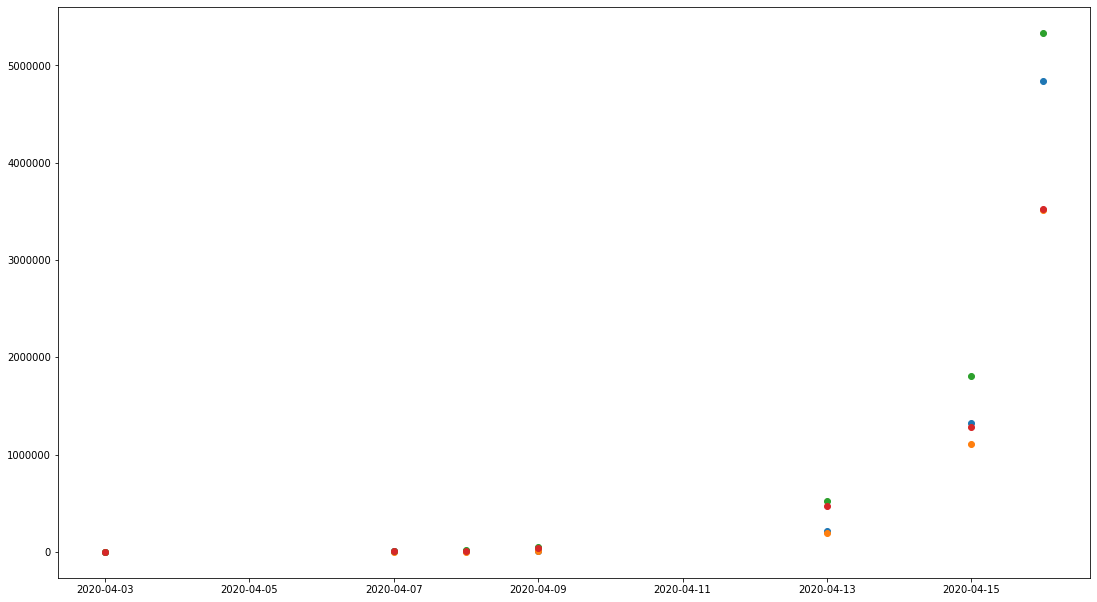

In [7]:


dates = matplotlib.dates.date2num(newDS['Date_CE'])
plt.plot_date(dates,newDS['Open Int_CE'])
plt.plot_date(dates,newDS['Change in OI_CE'])

plt.plot_date(dates,newDS['Open Int_PE'])
plt.plot_date(dates,newDS['Change in OI_PE'])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


No handles with labels found to put in legend.


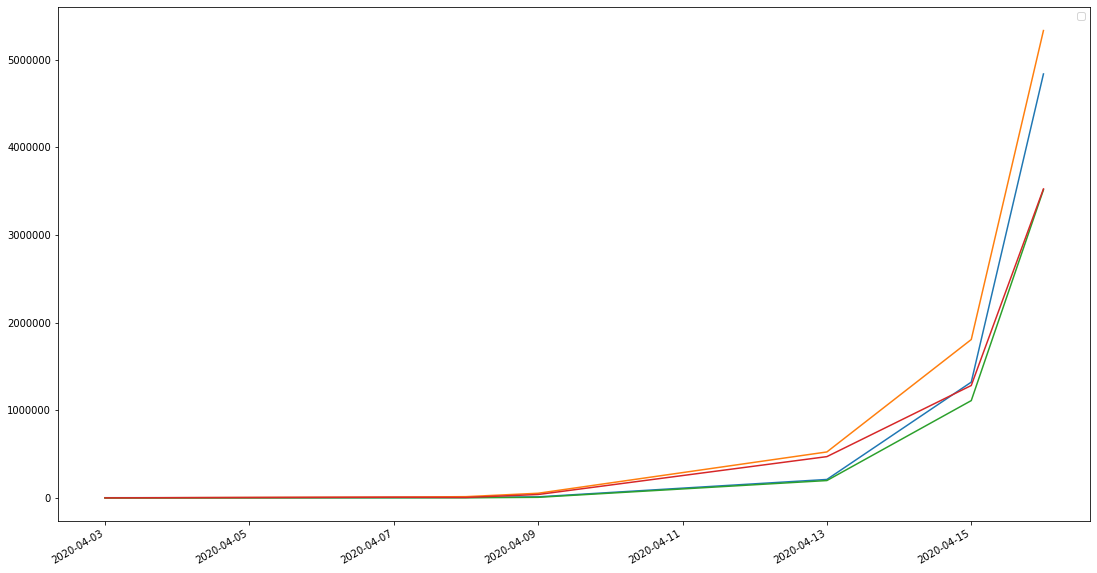

In [9]:
dates = newDS['Date_CE']
# y=newDS['Open Int_CE']
plt.plot(dates,newDS['Open Int_CE'])
plt.plot(dates,newDS['Open Int_PE'])

plt.plot(dates,newDS['Change in OI_CE'])
plt.plot(dates,newDS['Change in OI_PE'])


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


## 